#### Importación de librerías.

In [185]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly as pl
import scipy as sp
import itertools as it

# Configuración pandas
pd.set_option('display.max_columns', None)

#### Apertura y resumen del dataset.
En parquet, debido a que se hizo en la taréa anterior.

In [186]:
df = pd.read_parquet("GRD_2023_DESCRIPTIVE.parquet", engine="pyarrow")

df.info()
df.describe()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1038754 entries, 0 to 1039586
Data columns (total 24 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   COD_HOSPITAL         1038754 non-null  int64  
 1   CIP_ENCRIPTADO       1037121 non-null  float64
 2   SEXO                 1038715 non-null  object 
 3   FECHA_NACIMIENTO     1038744 non-null  object 
 4   SERVICIO_SALUD       1038013 non-null  object 
 5   TIPO_INGRESO         1038699 non-null  object 
 6   FECHA_INGRESO        1038754 non-null  object 
 7   FECHAALTA            1038754 non-null  object 
 8   TIPOALTA             1038754 non-null  object 
 9   DIAGNOSTICO1         1038754 non-null  object 
 10  IR_29301_COD_GRD     1038754 non-null  float64
 11  IR_29301_PESO        1038754 non-null  float64
 12  IR_29301_SEVERIDAD   1038754 non-null  float64
 13  IR_29301_MORTALIDAD  1038754 non-null  float64
 14  EDAD                 1038744 non-null  float64
 15  DIA

,COD_HOSPITAL,CIP_ENCRIPTADO,SEXO,FECHA_NACIMIENTO,SERVICIO_SALUD,TIPO_INGRESO,FECHA_INGRESO,FECHAALTA,TIPOALTA,DIAGNOSTICO1,IR_29301_COD_GRD,IR_29301_PESO,IR_29301_SEVERIDAD,IR_29301_MORTALIDAD,EDAD,DIAS_ESTANCIA,HOSPITAL,Versión,Descripción,Categoría,Sección,Capítulo,DESCRIPCION_GRD,peso_categoria
0,122100,72196813.0,HOMBRE,1980-04-13,VALDIVIA,URGENCIA,2023-03-12,2023-03-14,DOMICILIO,K35.3,64161.0,0.7094,1.0,1.0,43.0,2,Hospital Clínico Regional (Valdivia),CIE-v2013,Apendicitis aguda con peritonitis localizada,K35 APENDICITIS AGUDA,K35-K38 ENFERMEDADES DEL APÉNDICE,Cap.11 ENFERMEDADES DEL APARATO DIGESTIVO (K0...,MH INFECCIONES GASTROINTESTINALES MAYORES,Medio-Bajo
1,114101,NaN,HOMBRE,2001-11-04,METROPOLITANO SURORIENTE,URGENCIA,2023-11-04,2023-11-10,DOMICILIO,J93.1,41301.0,1.0869,1.0,1.0,22.0,6,Complejo Hospitalario Dr. Sótero del Río (San...,CIE-v2013,Otros tipos de neumotórax espontáneo,J93 NEUMOTÓRAX,J90-J94 OTRAS ENFERMEDADES DE LA PLEURA,Cap.10 ENFERMEDADES DEL APARATO RESPIRATORIO ...,PH PROCEDIMIENTOS MODERADAMENTE COMPLEJOS SOB...,Medio
2,114101,97627974.0,HOMBRE,2020-07-30,METROPOLITANO SURORIENTE,URGENCIA,2023-06-07,2023-06-08,HOSPITALIZACIÓN DOMICILIARIA,J12.1,44161.0,0.4084,1.0,1.0,3.0,1,Complejo Hospitalario Dr. Sótero del Río (San...,CIE-v2013,Neumonía debida a virus sincitial respiratorio,"J12 NEUMONÍA VIRAL, NO CLASIFICADA EN OTRA PARTE",J09-J18 GRIPE Y NEUMONÍA,Cap.10 ENFERMEDADES DEL APARATO RESPIRATORIO ...,MH NEUMONÍA SIMPLE Y TOS FERINA,Bajo
3,106103,67770674.0,MUJER,1978-11-14,VALPARAISO SAN ANTONIO,PROGRAMADA,2023-05-25,2023-05-26,DOMICILIO,N39.3,131301.0,0.6406,1.0,1.0,45.0,1,Hospital Claudio Vicuña (San Antonio),CIE-v2013,Incontinencia urinaria por tensión,N39 OTROS TRASTORNOS DEL SISTEMA URINARIO,N30-N39 OTRAS ENFERMEDADES DEL APARATO URINARIO,Cap.14 ENFERMEDADES DEL APARATO GENITOURINARI...,PH HISTERECTOMIA VAGINAL Y OTROS PROCEDIMIENT...,Medio-Bajo
4,106103,100390800.0,MUJER,2023-12-20,VALPARAISO SAN ANTONIO,URGENCIA,2023-12-28,2023-12-30,DOMICILIO,R17,74131.0,0.5346,1.0,1.0,0.0,2,Hospital Claudio Vicuña (San Antonio),CIE-v2013,Ictericia no especificada,R17 ICTERICIA NO ESPECIFICADA,R10-R19 SÍNTOMAS Y SIGNOS QUE AFECTAN AL APAR...,"Cap.18 SÍNTOMAS, SIGNOS Y RESULTADOS ANORMALE...","MH ENFERMEDADES HEPÁTICAS EXCEPTO NEOPLASIAS,...",Medio-Bajo


### Eliminar columnas que no se consideran necesarias. (O repetitivas).
Entre ellas:
- Versión
- IR_29301_PESO
- IR_29301_COD_GRD
- COD_HOSPITAL
- FECHA_NACIMIENTO
- Categoría
- Capítulo
- Sección
- DIAGNOSTICO1
- DESCRIPCION_GRD
- CIP_ENCRIPTADO

In [187]:
out = ["Versión", 'IR_29301_PESO', 'IR_29301_COD_GRD', 'COD_HOSPITAL', 'FECHA_NACIMIENTO', "Categoría", "Capítulo", "Sección", "DIAGNOSTICO1", "DESCRIPCION_GRD", "CIP_ENCRIPTADO"]
df = df.drop(out, axis=1)
df

,SEXO,SERVICIO_SALUD,TIPO_INGRESO,FECHA_INGRESO,FECHAALTA,TIPOALTA,IR_29301_SEVERIDAD,IR_29301_MORTALIDAD,EDAD,DIAS_ESTANCIA,HOSPITAL,Descripción,peso_categoria
0,HOMBRE,VALDIVIA,URGENCIA,2023-03-12,2023-03-14,DOMICILIO,1.0,1.0,43.0,2,Hospital Clínico Regional (Valdivia),Apendicitis aguda con peritonitis localizada,Medio-Bajo
1,HOMBRE,METROPOLITANO SURORIENTE,URGENCIA,2023-11-04,2023-11-10,DOMICILIO,1.0,1.0,22.0,6,Complejo Hospitalario Dr. Sótero del Río (San...,Otros tipos de neumotórax espontáneo,Medio
2,HOMBRE,METROPOLITANO SURORIENTE,URGENCIA,2023-06-07,2023-06-08,HOSPITALIZACIÓN DOMICILIARIA,1.0,1.0,3.0,1,Complejo Hospitalario Dr. Sótero del Río (San...,Neumonía debida a virus sincitial respiratorio,Bajo
3,MUJER,VALPARAISO SAN ANTONIO,PROGRAMADA,2023-05-25,2023-05-26,DOMICILIO,1.0,1.0,45.0,1,Hospital Claudio Vicuña (San Antonio),Incontinencia urinaria por tensión,Medio-Bajo
4,MUJER,VALPARAISO SAN ANTONIO,URGENCIA,2023-12-28,2023-12-30,DOMICILIO,1.0,1.0,0.0,2,Hospital Claudio Vicuña (San Antonio),Ictericia no especificada,Medio-Bajo
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039582,MUJER,COQUIMBO,OBSTETRICA,2023-01-01,2023-01-04,DOMICILIO,1.0,1.0,27.0,3,Hospital Dr. Antonio Tirado Lanas (Ovalle),"Aborto espontáneo, incompleto, complicado por ...",Medio-Bajo
1039583,MUJER,CONCEPCIÓN,PROGRAMADA,2023-06-14,2023-06-14,DOMICILIO,0.0,0.0,32.0,0,Hospital Clínico Regional Dr. Guillermo Grant...,Displasia cervical moderada,Muy Bajo
1039584,HOMBRE,LIBERTADOR B. O HIGGINS,URGENCIA,2023-11-29,2023-12-01,DOMICILIO,1.0,1.0,9.0,2,Hospital Regional de Rancagua,"Apendicitis aguda, otra y no especificada",Medio-Bajo
1039585,HOMBRE,OSORNO,PROGRAMADA,2023-03-28,2023-03-28,DOMICILIO,1.0,1.0,9.0,0,Hospital Base San José de Osorno,Asma predominantemente alérgica,Bajo


### Análisis variable objetivo (Días estancia)


In [188]:
array = np.array(df["DIAS_ESTANCIA"])
print('DÍAS DE ESTANCIA')
print('\n---------------------------------------------------------------------------\n')
print(f'Mínimo:              {np.nanmin(array)}')
print(f'10%:                 {np.nanpercentile(array, 10)}')
print(f'25%:                 {np.nanpercentile(array, 25)}')
print(f'Mediana:             {np.nanmedian(array)}')
print(f'75%:                 {np.nanpercentile(array, 75)}')
print(f'90%:                 {np.nanpercentile(array, 90)}')
print(f'Máximo:              {np.nanmax(array)}')    
print(f'Promedio:            {round(np.nanmean(array), 2)}')
print(f'Desviación Estandar: {round(np.nanstd(array), 2)}')
print("\n---------------------------------------------------------------------------\n")

DÍAS DE ESTANCIA

---------------------------------------------------------------------------

Mínimo:              0
10%:                 0.0
25%:                 1.0
Mediana:             2.0
75%:                 6.0
90%:                 14.0
Máximo:              696
Promedio:            5.8
Desviación Estandar: 12.35

---------------------------------------------------------------------------



#### Debido a la diferencia entre el percentil 90 y el máximo, se realiza un análisis más profundo.

In [189]:
array = np.array(df["DIAS_ESTANCIA"])
print('DÍAS DE ESTANCIA:')
print('\n---------------------------------------------------------------------------\n')
print(f'91%:                 {np.nanpercentile(array, 91)}')
print(f'92%:                 {np.nanpercentile(array, 92)}')
print(f'93%:                 {np.nanpercentile(array, 93)}')
print(f'94%:                 {np.nanpercentile(array, 94)}')
print(f'95%:                 {np.nanpercentile(array, 95)}')
print(f'96%:                 {np.nanpercentile(array, 96)}')
print(f'97%:                 {np.nanpercentile(array, 97)}')
print(f'98%:                 {np.nanpercentile(array, 98)}')
print(f'99%:                 {np.nanpercentile(array, 99)}')
print("\n---------------------------------------------------------------------------\n")

DÍAS DE ESTANCIA:

---------------------------------------------------------------------------

91%:                 15.0
92%:                 16.0
93%:                 18.0
94%:                 20.0
95%:                 22.0
96%:                 25.0
97%:                 30.0
98%:                 37.0
99%:                 53.0

---------------------------------------------------------------------------



### Limpieza segun recomendaciones
Como se ve anteriormente, el último 9% de los días de estancia comienza a dispararse, por ende, se considerarán outliers y se eliminaran. Además, debido a que nuestro objetivo es predecir los días de estancia, no se considerarán consultas ambulatorias (0 días de estancia).

In [190]:
# Quitar días de estancia = 0 ó días de estancia > 15.
df = df[(df['DIAS_ESTANCIA'] > 0) & (df['DIAS_ESTANCIA'] <= 15)]
len(df)

728526


### Manejo de nulos

In [191]:
for var in df.columns:
    if df[var].isnull().sum() > 0:
        print(f'Variable: {var}')
        print(f'Número de nulos: {df[var].isnull().sum()}')
        print(f'Porcentaje de nulos: {round((df[var].isnull().sum()/len(df))*100, 2)}%')
        print('\n---------------------------------------------------------------------------\n')

Variable: SEXO
Número de nulos: 29
Porcentaje de nulos: 0.0%

---------------------------------------------------------------------------

Variable: SERVICIO_SALUD
Número de nulos: 633
Porcentaje de nulos: 0.09%

---------------------------------------------------------------------------

Variable: TIPO_INGRESO
Número de nulos: 42
Porcentaje de nulos: 0.01%

---------------------------------------------------------------------------

Variable: EDAD
Número de nulos: 4
Porcentaje de nulos: 0.0%

---------------------------------------------------------------------------

Variable: Descripción
Número de nulos: 30
Porcentaje de nulos: 0.0%

---------------------------------------------------------------------------



#### Debido a que la cantidad de nulos es menos de un 1% por variable, se eliminan sin generar un cambio significativo.

In [192]:
df.dropna(inplace=True)
len(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 727788 entries, 0 to 1039586
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SEXO                 727788 non-null  object 
 1   SERVICIO_SALUD       727788 non-null  object 
 2   TIPO_INGRESO         727788 non-null  object 
 3   FECHA_INGRESO        727788 non-null  object 
 4   FECHAALTA            727788 non-null  object 
 5   TIPOALTA             727788 non-null  object 
 6   IR_29301_SEVERIDAD   727788 non-null  float64
 7   IR_29301_MORTALIDAD  727788 non-null  float64
 8   EDAD                 727788 non-null  float64
 9   DIAS_ESTANCIA        727788 non-null  int64  
 10  HOSPITAL             727788 non-null  object 
 11  Descripción          727788 non-null  object 
 12  peso_categoria       727788 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 77.7+ MB


C:\Users\raalv\AppData\Local\Temp\ipykernel_4336\4006086954.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


### Filtrar por la región metropolitana

In [193]:
df = df[df["SERVICIO_SALUD"].str.contains("METROPOLITANO")]
df

,SEXO,SERVICIO_SALUD,TIPO_INGRESO,FECHA_INGRESO,FECHAALTA,TIPOALTA,IR_29301_SEVERIDAD,IR_29301_MORTALIDAD,EDAD,DIAS_ESTANCIA,HOSPITAL,Descripción,peso_categoria
1,HOMBRE,METROPOLITANO SURORIENTE,URGENCIA,2023-11-04,2023-11-10,DOMICILIO,1.0,1.0,22.0,6,Complejo Hospitalario Dr. Sótero del Río (San...,Otros tipos de neumotórax espontáneo,Medio
2,HOMBRE,METROPOLITANO SURORIENTE,URGENCIA,2023-06-07,2023-06-08,HOSPITALIZACIÓN DOMICILIARIA,1.0,1.0,3.0,1,Complejo Hospitalario Dr. Sótero del Río (San...,Neumonía debida a virus sincitial respiratorio,Bajo
31,HOMBRE,METROPOLITANO ORIENTE,PROGRAMADA,2023-08-09,2023-08-10,DOMICILIO,2.0,1.0,11.0,1,Hospital de Niños Dr. Luis Calvo Mackenna (Sa...,Fisura del paladar duro y del paladar blando c...,Medio
32,MUJER,METROPOLITANO SURORIENTE,OBSTETRICA,2023-08-28,2023-08-30,DOMICILIO,1.0,1.0,23.0,2,Hospital Clínico Metropolitano La Florida Dra...,Parto por cesárea de emergencia,Bajo
64,HOMBRE,METROPOLITANO CENTRAL,URGENCIA,2023-07-31,2023-08-04,DOMICILIO,1.0,1.0,47.0,4,Hospital de Urgencia Asistencia Pública Dr. A...,Cálculo de conducto biliar con colangitis,Medio-Bajo
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039556,MUJER,METROPOLITANO ORIENTE,PROGRAMADA,2023-05-31,2023-06-01,DOMICILIO,1.0,1.0,15.0,1,Hospital de Niños Dr. Luis Calvo Mackenna (Sa...,Luxación y subluxación recidivante de la artic...,Medio
1039561,MUJER,METROPOLITANO CENTRAL,URGENCIA,2023-08-15,2023-08-21,DOMICILIO,1.0,1.0,11.0,6,Hospital Clínico San Borja-Arriarán (Santiago...,Celulitis de otras partes de los miembros,Bajo
1039566,MUJER,METROPOLITANO NORTE,PROGRAMADA,2023-09-26,2023-09-27,DOMICILIO,1.0,1.0,3.0,1,Hospital Clínico de Niños Dr. Roberto del Río...,Tumor benigno de la laringe,Medio
1039570,MUJER,METROPOLITANO SURORIENTE,PROGRAMADA,2023-09-22,2023-09-23,DOMICILIO,1.0,1.0,69.0,1,Hospital Padre Alberto Hurtado (San Ramón),Cálculo de la vesícula biliar con otra colecis...,Medio


### Agrupación de edades (creación de grupos etarios)
Con las siguientes categorías (respectoa las edades):
- Infante (< 1)
- Niño (de 1 a 11)
- Adolescente (12 a 17)
- Adulto Joven (18 a 29)
- Adulto (30 a 64)
- Adulto Mayor (>65)

In [ ]:
def clasificar_edad(edad):
    if edad < 1:
        return "Infante"
    elif 1 <= edad <= 11:
        return "Niño"
    elif 12 <= edad <= 17:
        return "Adolescente"
    elif 18 <= edad <= 29:
        return "Adulto"
    elif 30 <= edad <= 64:
        return "Adulto"
    else:
        return "Adulto mayor"

df["Grupo Etario"] = df["EDAD"].apply(clasificar_edad)

#### Paso a parquet, para futuras entregas.

In [ ]:
# Exportación a parquet, para futuros análisis.
df.to_parquet("GRD_2023_DESCRIPTIVE_CLEAN.parquet", engine="pyarrow", index=False)
# df.to_csv("GRD_2023_DESCRIPTIVE_CLEAN.csv", index=False)

## Análisis profundo de las variables.
#### Métricas principales de las 3 variables elegidas.
- DIAS_ESTANCIA (Variable Objetivo)
- IR_29031_SEVERIDAD
- IR_29031_MORTALIDAD

(Por otro lado está la variable categórica Descripción, pero esta no es numérica. El análisis es distinto)
#### 1. DIAS_ESTANCIA (De nuevo, por la eliminación de outliers).
- métricas

In [200]:
array = np.array(df["DIAS_ESTANCIA"])
print('DÍAS DE ESTANCIA')
print('\n---------------------------------------------------------------------------\n')
print(f'Mínimo:              {np.nanmin(array)}')
print(f'10%:                 {np.nanpercentile(array, 10)}')
print(f'25%:                 {np.nanpercentile(array, 25)}')
print(f'Mediana:             {np.nanmedian(array)}')
print(f'75%:                 {np.nanpercentile(array, 75)}')
print(f'90%:                 {np.nanpercentile(array, 90)}')
print(f'Máximo:              {np.nanmax(array)}')    
print(f'Promedio:            {round(np.nanmean(array), 2)}')
print(f'Desviación Estandar: {round(np.nanstd(array), 2)}')
print("\n---------------------------------------------------------------------------\n")

DÍAS DE ESTANCIA

---------------------------------------------------------------------------

Mínimo:              1
10%:                 1.0
25%:                 2.0
Mediana:             3.0
75%:                 6.0
90%:                 9.0
Máximo:              15
Promedio:            4.18
Desviación Estandar: 3.39

---------------------------------------------------------------------------



- Media por sexo

Promedio de DIAS_ESTANCIA por SEXO:
  SEXO  PROM_DIAS_ESTANCIA
HOMBRE            4.708314
 MUJER            3.856314


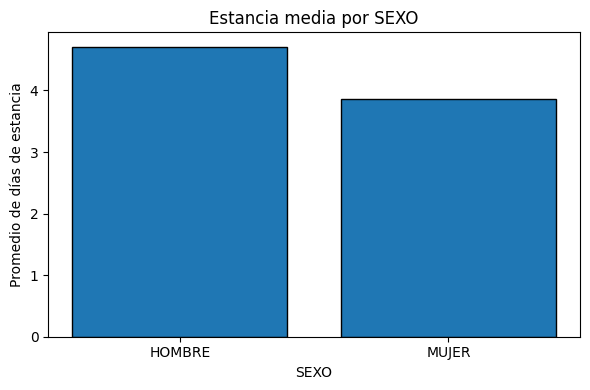

In [205]:
sexo_grp = (
    df
    .groupby('SEXO')['DIAS_ESTANCIA']
    .mean()
    .reset_index(name='PROM_DIAS_ESTANCIA')
)

# 2) Mostrar tabla
print("Promedio de DIAS_ESTANCIA por SEXO:")
print(sexo_grp.to_string(index=False))

# 3) Gráfico de barras
plt.figure(figsize=(6,4))
plt.bar(sexo_grp['SEXO'].astype(str), sexo_grp['PROM_DIAS_ESTANCIA'], edgecolor='black')
plt.xlabel('SEXO')
plt.ylabel('Promedio de días de estancia')
plt.title('Estancia media por SEXO')
plt.tight_layout()
plt.show()

- Media por grupo etario

Promedio de DIAS_ESTANCIA por GRUPO_ETARIO:
Grupo Etario  PROM_DIAS_ESTANCIA
Adulto mayor            5.217558
     Infante            4.545234
        Niño            3.929671
 Adolescente            3.775684
      Adulto            3.754715


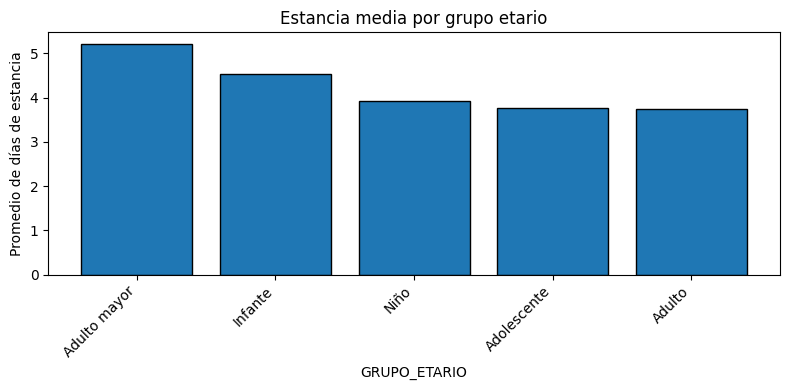

In [210]:
edad_grp = (
    df
    .groupby('Grupo Etario')['DIAS_ESTANCIA']
    .mean()
    .reset_index(name='PROM_DIAS_ESTANCIA')
    .sort_values(by="PROM_DIAS_ESTANCIA", ascending = False)
)

# 2) Mostrar tabla
print("Promedio de DIAS_ESTANCIA por GRUPO_ETARIO:")
print(edad_grp.to_string(index=False))

# 3) Gráfico de barras
plt.figure(figsize=(8,4))
plt.bar(edad_grp['Grupo Etario'].astype(str), edad_grp['PROM_DIAS_ESTANCIA'], edgecolor='black')
plt.xlabel('GRUPO_ETARIO')
plt.ylabel('Promedio de días de estancia')
plt.title('Estancia media por grupo etario')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

- Media por hospitales

Top 15 hospitales por promedio de estancia:
                                                             HOSPITAL  PROM_DIAS_ESTANCIA
                                 Hospital Dr. Abraham Godoy (Lautaro)            6.200000
                           Hospital Dr. Antonio Tirado Lanas (Ovalle)            6.117647
                  Hospital Provincial Dr. Rafael Avaría (Curanilahue)            6.000000
                    Hospital Dr. Eduardo Pereira Ramírez (Valparaíso)            5.692308
                               Hospital Carlos Van Buren (Valparaíso)            5.679612
  Instituto Nacional de Enfermedades Respiratorias y Cirugía Torácica            5.396620
                        Hospital Del Salvador (Santiago, Providencia)            5.318656
                             Hospital Intercultural de Nueva Imperial            5.315789
                                               Hospital de Pitrufquén            5.000000
 Hospital Clínico Regional Dr. Guillermo Grant Benavente

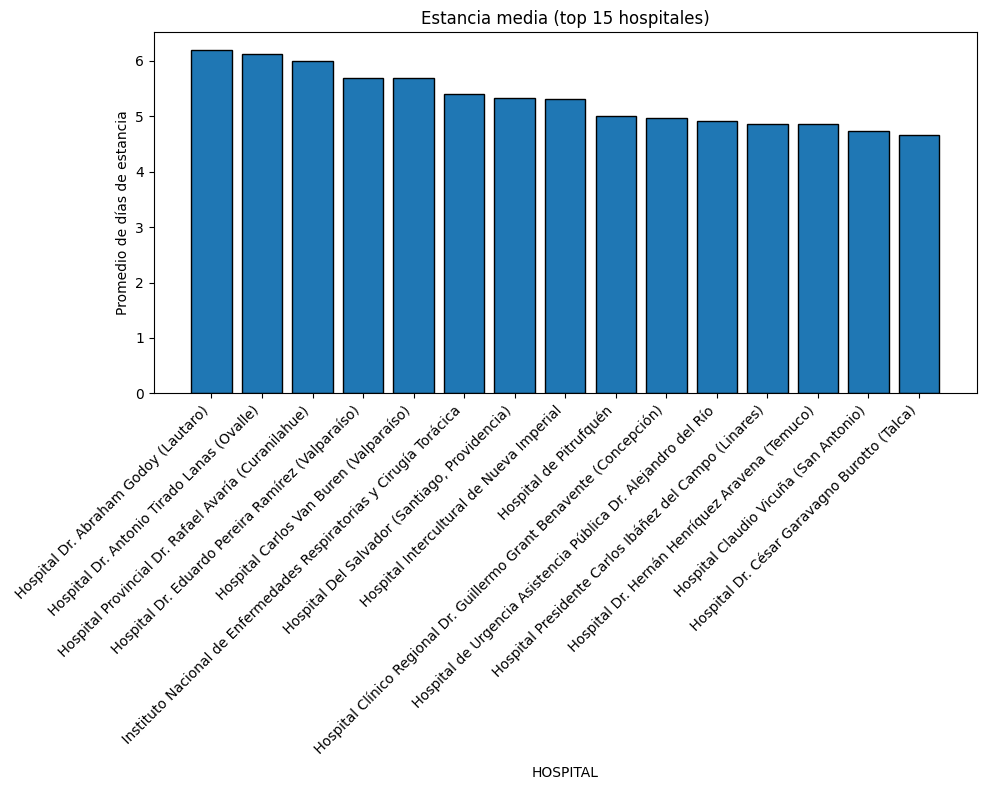

In [214]:
hosp_grp = (
    df
    .groupby('HOSPITAL')['DIAS_ESTANCIA']
    .mean()
    .reset_index(name='PROM_DIAS_ESTANCIA')
    .sort_values('PROM_DIAS_ESTANCIA', ascending=False)
    .head(15)
)

# 2) Mostrar tabla
print("Top 15 hospitales por promedio de estancia:")
print(hosp_grp.to_string(index=False))

# 3) Gráfico de barras
plt.figure(figsize=(10,8))
plt.bar(hosp_grp['HOSPITAL'].astype(str), hosp_grp['PROM_DIAS_ESTANCIA'], edgecolor='black')
plt.xlabel('HOSPITAL')
plt.ylabel('Promedio de días de estancia')
plt.title('Estancia media (top 15 hospitales)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

- Media por severidad

Promedio de DIAS_ESTANCIA por IR_29301_SEVERIDAD:
 IR_29301_SEVERIDAD  PROM_DIAS_ESTANCIA
                3.0            5.845803
                2.0            4.546151
                1.0            3.211362
                0.0            1.032237


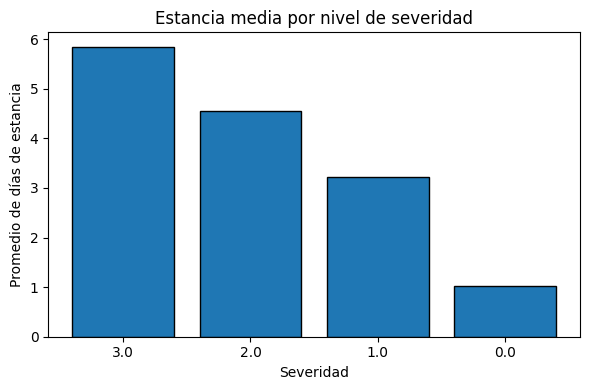

In [266]:
sev_grp = (
    df
    .groupby('IR_29301_SEVERIDAD')['DIAS_ESTANCIA']
    .mean()
    .reset_index(name='PROM_DIAS_ESTANCIA')
    .sort_values('PROM_DIAS_ESTANCIA', ascending = False)
)

# 2) Mostrar tabla
print("Promedio de DIAS_ESTANCIA por IR_29301_SEVERIDAD:")
print(sev_grp.to_string(index=False))

# 3) Gráfico de barras
plt.figure(figsize=(6,4))
plt.bar(sev_grp['IR_29301_SEVERIDAD'].astype(str), sev_grp['PROM_DIAS_ESTANCIA'], edgecolor='black')
plt.xlabel('Severidad')
plt.ylabel('Promedio de días de estancia')
plt.title('Estancia media por nivel de severidad')
plt.tight_layout()
plt.show()

- Media por mortalidad

Promedio de DIAS_ESTANCIA por IR_29301_MORTALIDAD:
 IR_29301_MORTALIDAD  PROM_DIAS_ESTANCIA
                 3.0            5.828425
                 2.0            5.253652
                 1.0            3.394692
                 0.0            1.032237


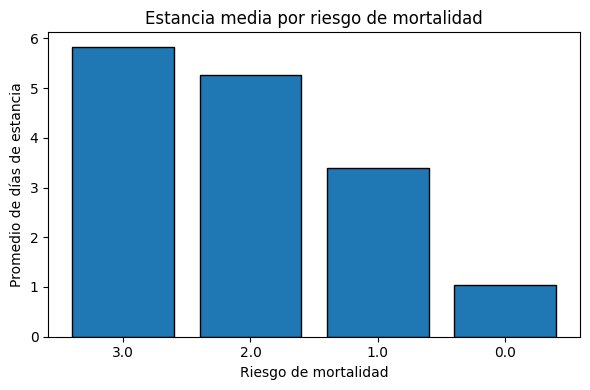

In [265]:
mort_grp = (
    df
    .groupby('IR_29301_MORTALIDAD')['DIAS_ESTANCIA']
    .mean()
    .reset_index(name='PROM_DIAS_ESTANCIA')
    .sort_values('PROM_DIAS_ESTANCIA', ascending = False)
)

# 2) Mostrar tabla
print("Promedio de DIAS_ESTANCIA por IR_29301_MORTALIDAD:")
print(mort_grp.to_string(index=False))

# 3) Gráfico de barras
plt.figure(figsize=(6,4))
plt.bar(mort_grp['IR_29301_MORTALIDAD'].astype(str), mort_grp['PROM_DIAS_ESTANCIA'], edgecolor='black')
plt.xlabel('Riesgo de mortalidad')
plt.ylabel('Promedio de días de estancia')
plt.title('Estancia media por riesgo de mortalidad')
plt.tight_layout()
plt.show()

#### 2. IR_29301_SEVERIDAD

In [203]:
array = np.array(df["IR_29301_SEVERIDAD"])
print('IR_29301_SEVERIDAD')
print('\n---------------------------------------------------------------------------\n')
print(f'Mínimo:              {np.nanmin(array)}')
print(f'10%:                 {np.nanpercentile(array, 10)}')
print(f'25%:                 {np.nanpercentile(array, 25)}')
print(f'Mediana:             {np.nanmedian(array)}')
print(f'75%:                 {np.nanpercentile(array, 75)}')
print(f'90%:                 {np.nanpercentile(array, 90)}')
print(f'Máximo:              {np.nanmax(array)}')    
print(f'Promedio:            {round(np.nanmean(array), 2)}')
print(f'Desviación Estandar: {round(np.nanstd(array), 2)}')
print("\n---------------------------------------------------------------------------\n")

IR_29301_SEVERIDAD

---------------------------------------------------------------------------

Mínimo:              0.0
10%:                 1.0
25%:                 1.0
Mediana:             2.0
75%:                 2.0
90%:                 3.0
Máximo:              3.0
Promedio:            1.74
Desviación Estandar: 0.84

---------------------------------------------------------------------------



#### 3. IR_29301_MORTALIDAD

In [204]:
array = np.array(df["IR_29301_MORTALIDAD"])
print('IR_29301_MORTALIDAD')
print('\n---------------------------------------------------------------------------\n')
print(f'Mínimo:              {np.nanmin(array)}')
print(f'10%:                 {np.nanpercentile(array, 10)}')
print(f'25%:                 {np.nanpercentile(array, 25)}')
print(f'Mediana:             {np.nanmedian(array)}')
print(f'75%:                 {np.nanpercentile(array, 75)}')
print(f'90%:                 {np.nanpercentile(array, 90)}')
print(f'Máximo:              {np.nanmax(array)}')    
print(f'Promedio:            {round(np.nanmean(array), 2)}')
print(f'Desviación Estandar: {round(np.nanstd(array), 2)}')
print("\n---------------------------------------------------------------------------\n")

IR_29301_MORTALIDAD

---------------------------------------------------------------------------

Mínimo:              0.0
10%:                 1.0
25%:                 1.0
Mediana:             1.0
75%:                 2.0
90%:                 3.0
Máximo:              3.0
Promedio:            1.57
Desviación Estandar: 0.83

---------------------------------------------------------------------------



#### 4. Descripción 
métricas principales

In [270]:
rep = df.groupby("Descripción")["Descripción"].count().to_frame(name = "Apariciones").sort_values("Apariciones", ascending = False)

print('IR_29301_MORTALIDAD')
print('\n---------------------------------------------------------------------------\n')
print(f'Cantidad de únicos:  {len(df["Descripción"].unique())}')
print(f'Más Repetido:        {rep.index.values[0]}')
print(f'Veces Repetido:      {rep.values[0][0]}')
print("\n---------------------------------------------------------------------------\n")

IR_29301_MORTALIDAD

---------------------------------------------------------------------------

Cantidad de únicos:  5341
Más Repetido:        Apendicitis aguda, otra y no especificada
Veces Repetido:      4412

---------------------------------------------------------------------------



10 más repetidos

,Apariciones
Descripción,
"Apendicitis aguda, otra y no especificada",4412
Desgarro perineal de primer grado durante el parto,3931
"Parto único espontáneo, presentación cefálica de vértice",3062
Atención materna por cicatriz uterina debida a cirugía previa,3043
Cálculo de la vesícula biliar con colecistitis aguda,2801
Cálculo de la vesícula biliar sin colecistitis,2572
Nefritis tubulointersticial aguda,2480
"Ruptura prematura de las membranas, e inicio del trabajo de parto dentro de las 24 horas",2285
Neumonía debida a virus sincitial respiratorio,2217


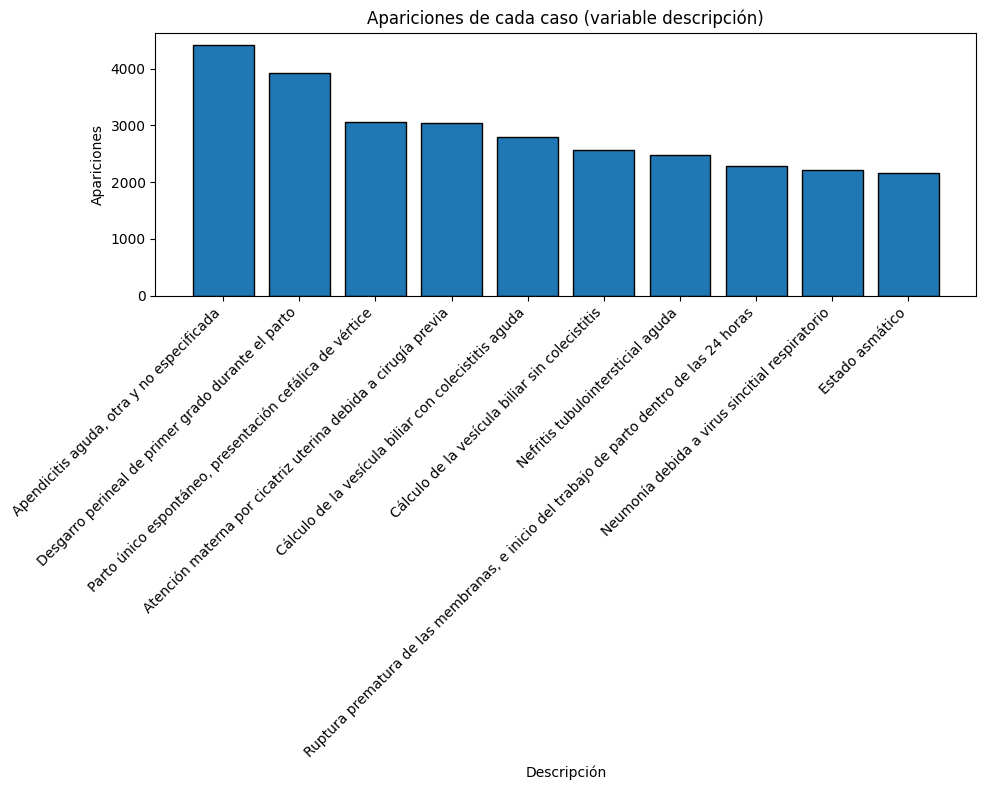

In [275]:
rep = df.groupby("Descripción")["Descripción"].count().to_frame(name = "Apariciones").sort_values("Apariciones", ascending = False).head(10)

display(rep)

rep = rep.reset_index(names='Descripción')

plt.figure(figsize=(10,8))
plt.bar(rep['Descripción'].astype(str), rep['Apariciones'], edgecolor='black')
plt.xlabel('Descripción')
plt.ylabel('Apariciones')
plt.title('Apariciones de cada caso (variable descripción)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Correlaciones de las variables.
#### Separación entre variables categoricas y numéricas.
De esta manera, se pueden hacer las correlaciones:
- categoria-número
- categoría-categoría
- número-número

In [196]:
# Separación de variables categóricas y numéricas
df_copy = df.copy()
obj = []
num = []
for i in df_copy.columns:
    if df_copy[i].dtype == "object":
        obj.append(i)
        df_copy[i] = pd.Categorical(df_copy[i])
    else:
        num.append(i)
obj2 = obj

df_copy_cat = df_copy[obj]
df_copy_num = df_copy[num]

### Correlación entre variables categóricas y numéricas.

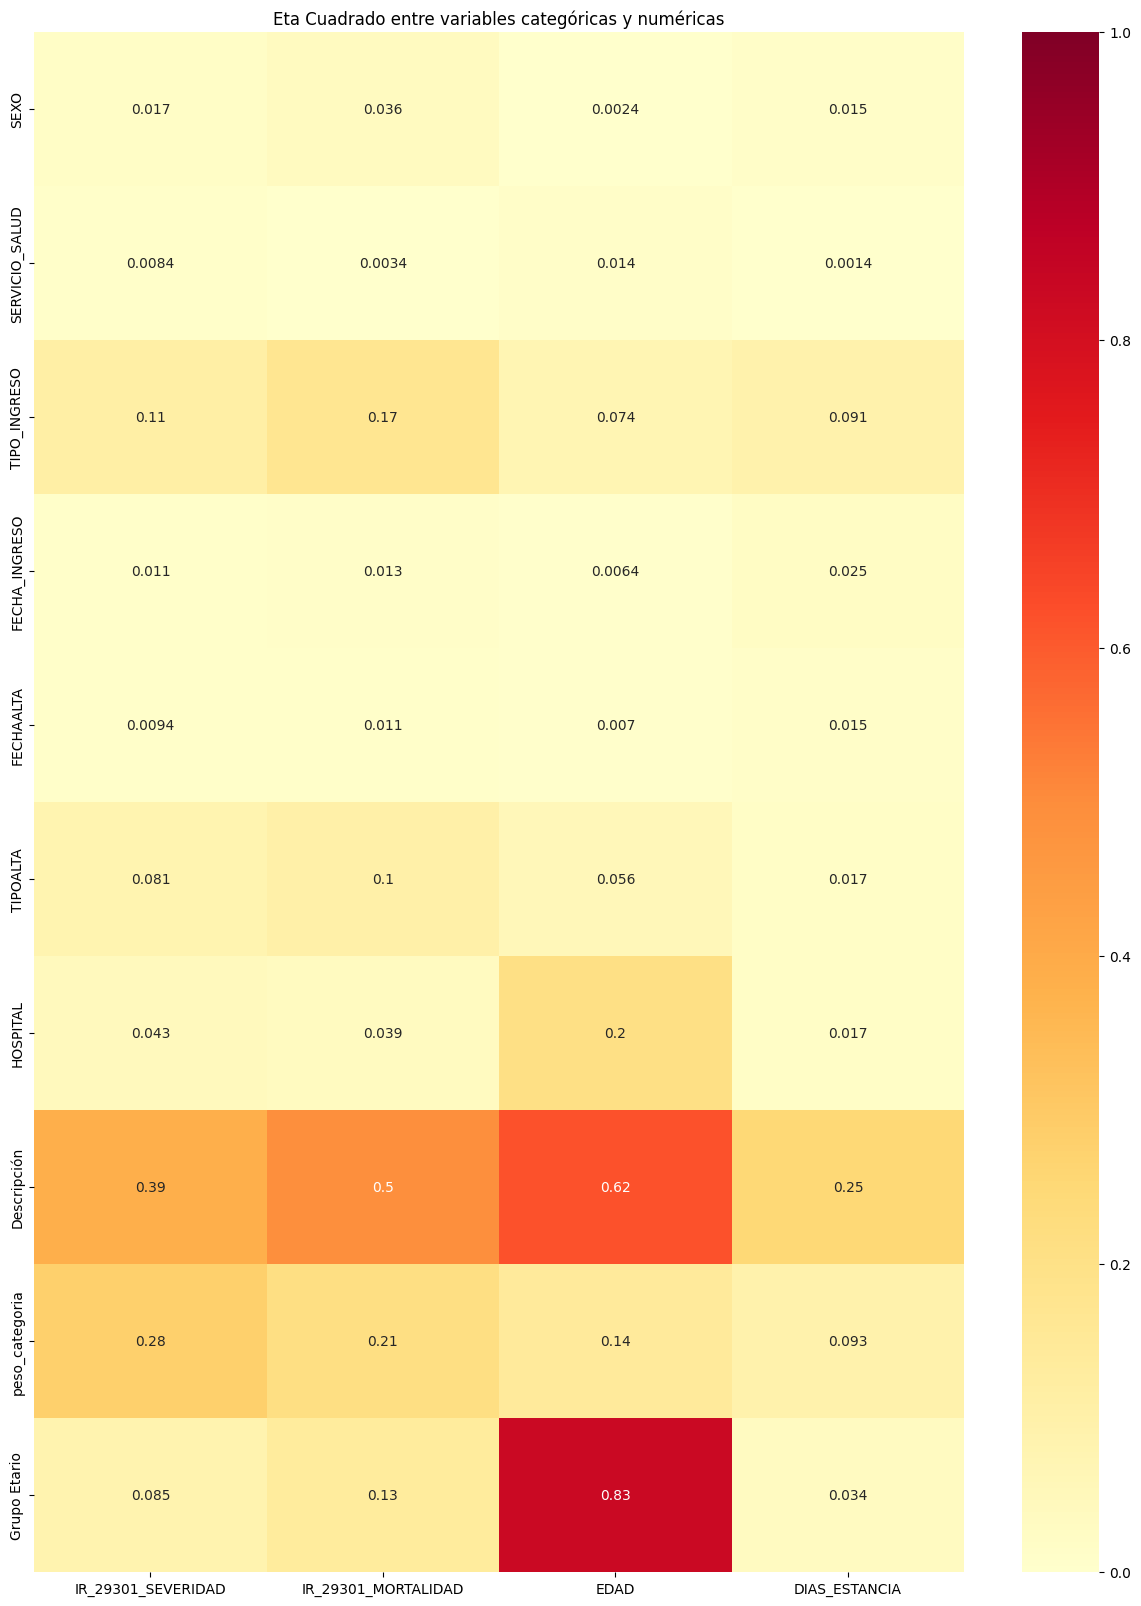

In [197]:
def eta_squared(df, num_col, cat_col):
    categories = df[cat_col].unique()
    grand_mean = df[num_col].mean()
    ss_between = sum(
        len(df[df[cat_col] == cat]) * (df[df[cat_col] == cat][num_col].mean() - grand_mean) ** 2
        for cat in categories
    )
    ss_total = sum((df[num_col] - grand_mean) ** 2)
    return ss_between / ss_total

corr_matrix = pd.DataFrame(index = obj, columns = num)

for i in obj:
    for j in num:
        eta = eta_squared(df_copy, j, i)
        corr_matrix.loc[i, j] = eta

corr_matrix = corr_matrix.astype(float)
corr_matrix = corr_matrix.fillna(0)

fig = plt.figure(figsize=(15,20))
sns.heatmap(corr_matrix, annot = True, cmap = "YlOrRd", vmin = 0, vmax = 1)
plt.title("Eta Cuadrado entre variables categóricas y numéricas")
plt.savefig("corr_cat_num.png", dpi = 300, bbox_inches = "tight")
plt.show()


### Correlación solo entre variables categóricas.

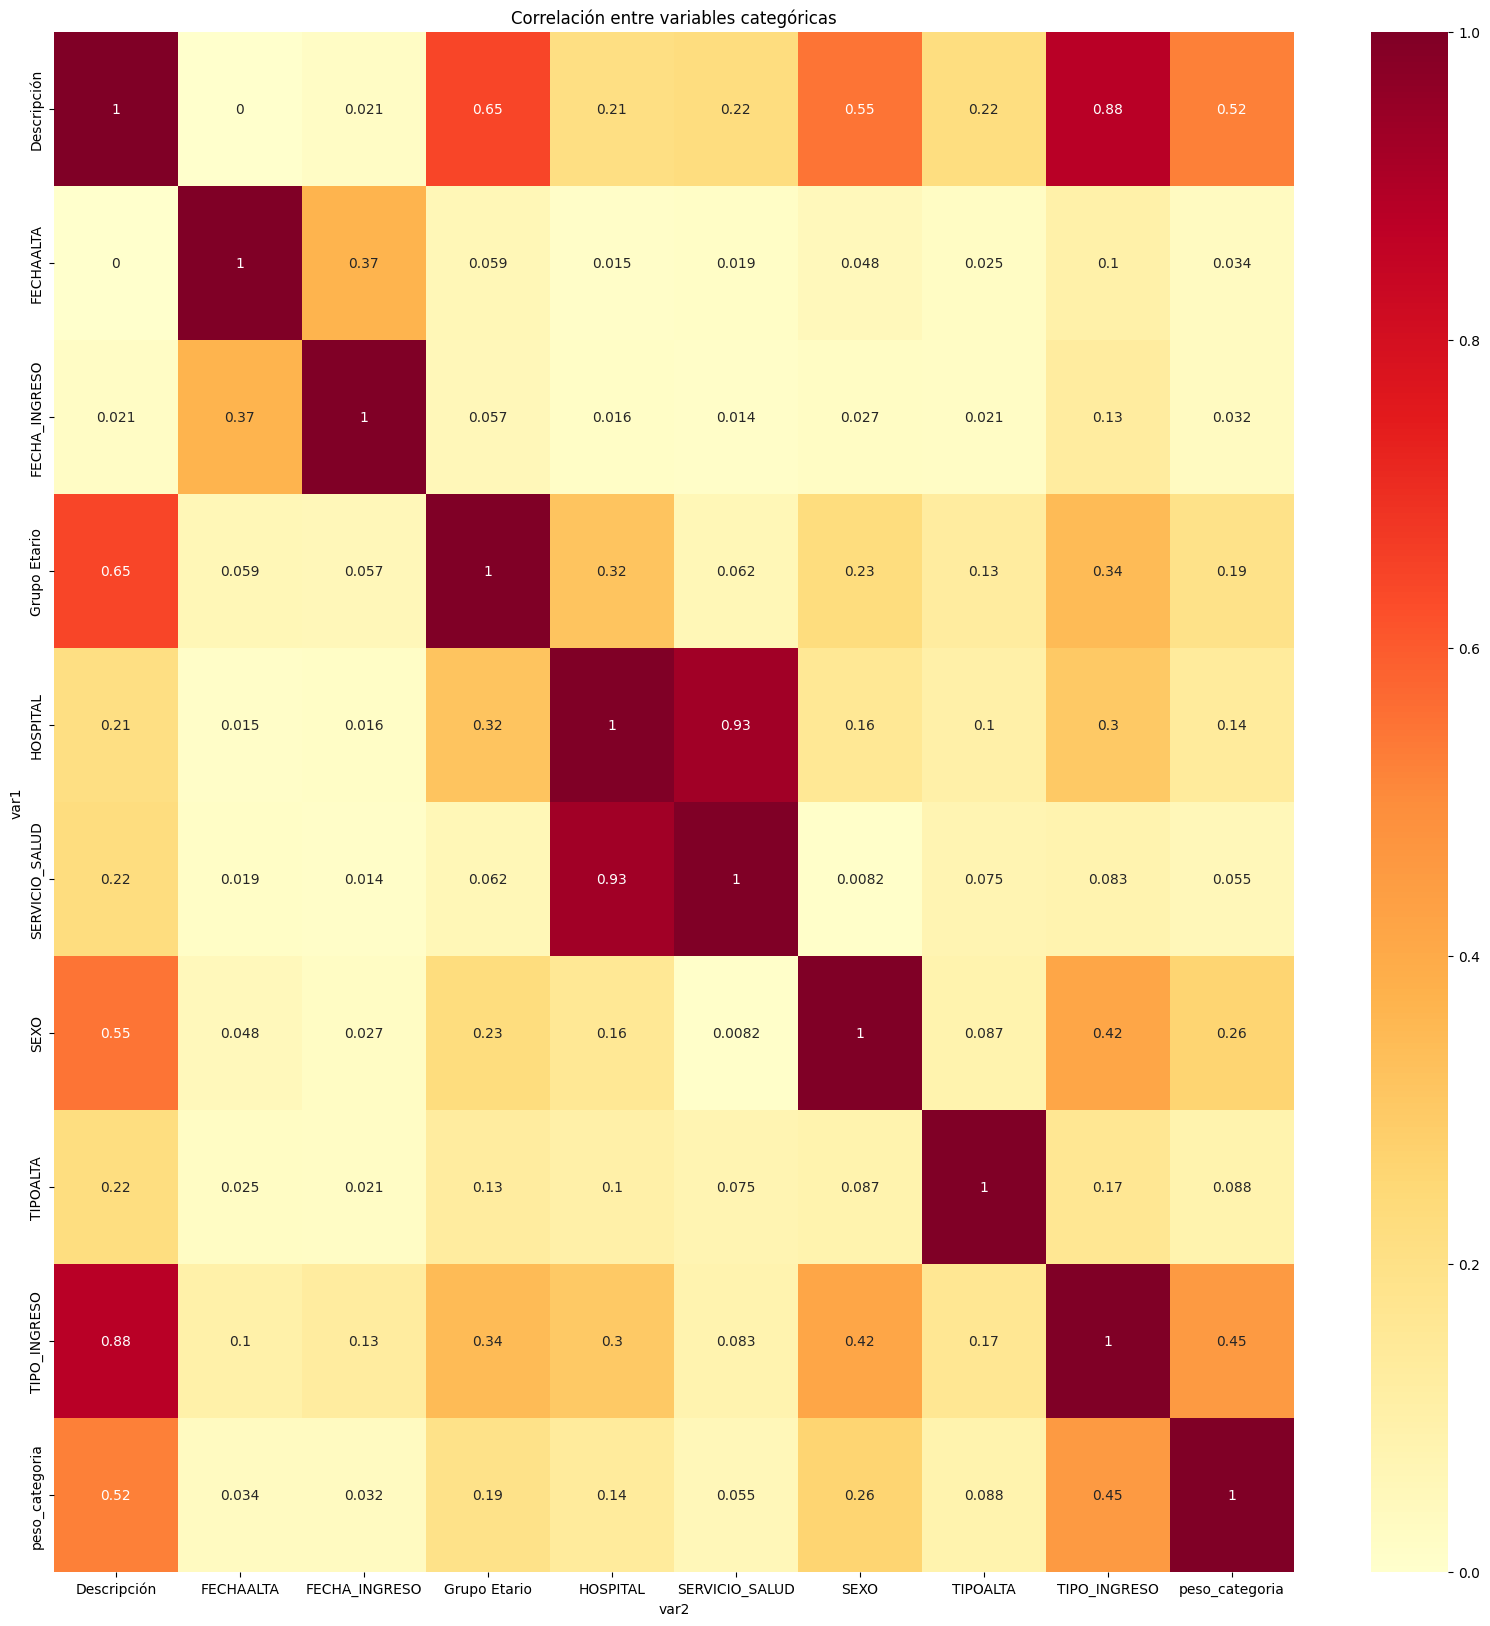

In [198]:
cat_var_prod = list(it.product(obj,obj2, repeat = 1))
result = []

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = sp.stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

for i in cat_var_prod:
    result.append((i[0], i[1], cramers_v(df_copy_cat[i[0]], df_copy_cat[i[1]])))

corr_output = pd.DataFrame(result, columns = ["var1", "var2", "Corr"])
corr_output = corr_output.pivot(index = "var1", columns="var2", values = "Corr")
corr_output = corr_output.astype(float)

fig = plt.figure(figsize=(20,20))
sns.heatmap(corr_output, annot = True, cmap = "YlOrRd", vmin = 0, vmax = 1)
plt.title("Correlación entre variables categóricas")
plt.savefig("corr_cat_cat.png", dpi = 300, bbox_inches = "tight")
plt.show()


### Correlación variables numéricas.

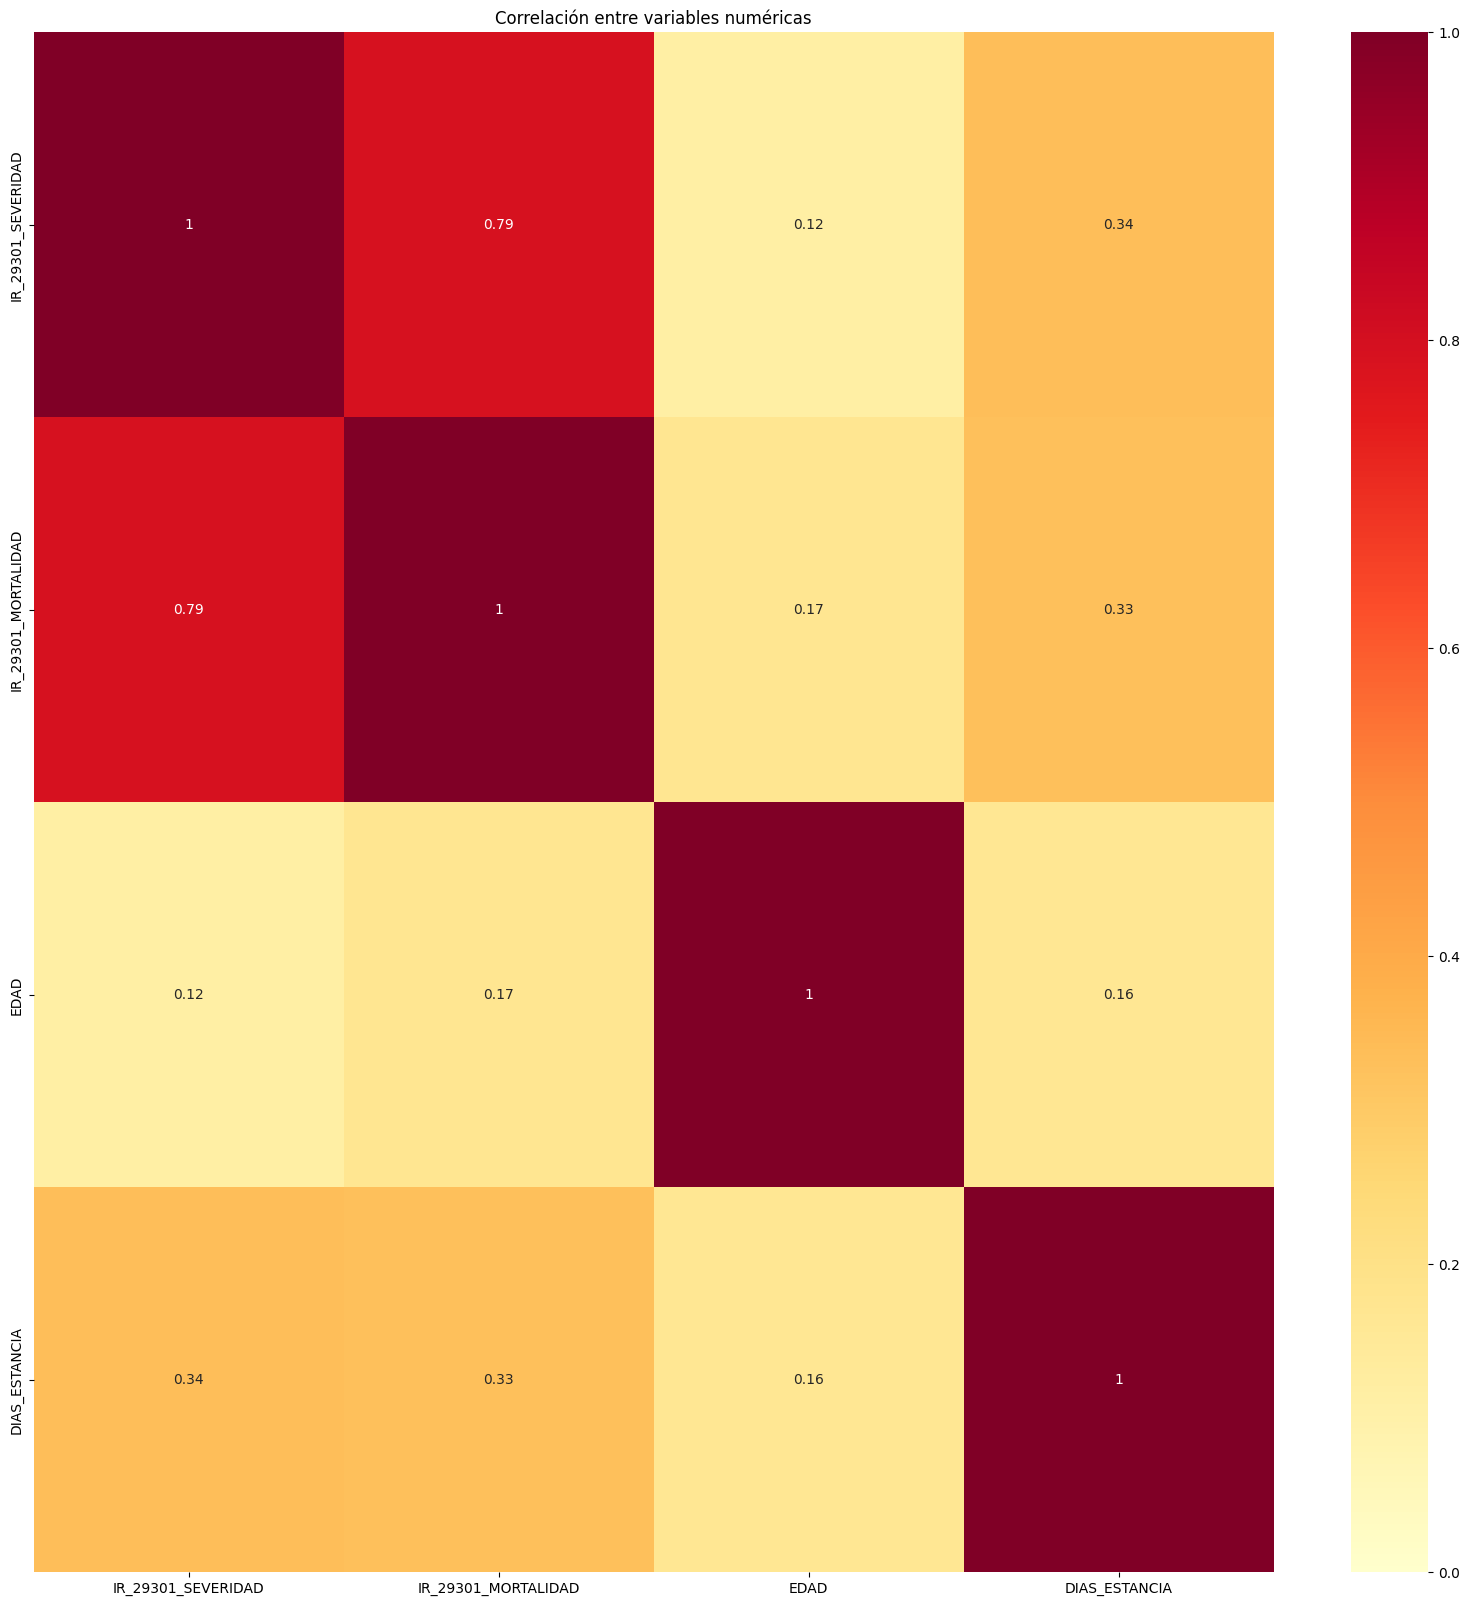

In [199]:
correlations = df_copy_num.corr(method = "pearson")

fig = plt.figure(figsize=(20,20))
sns.heatmap(correlations, annot = True, cmap = "YlOrRd", vmin = 0, vmax = 1)
plt.title("Correlación entre variables numéricas")
plt.savefig("corr_num_num.png", dpi = 300, bbox_inches = "tight")
plt.show()

#### Correlaciones con las variables importantes elegidas.

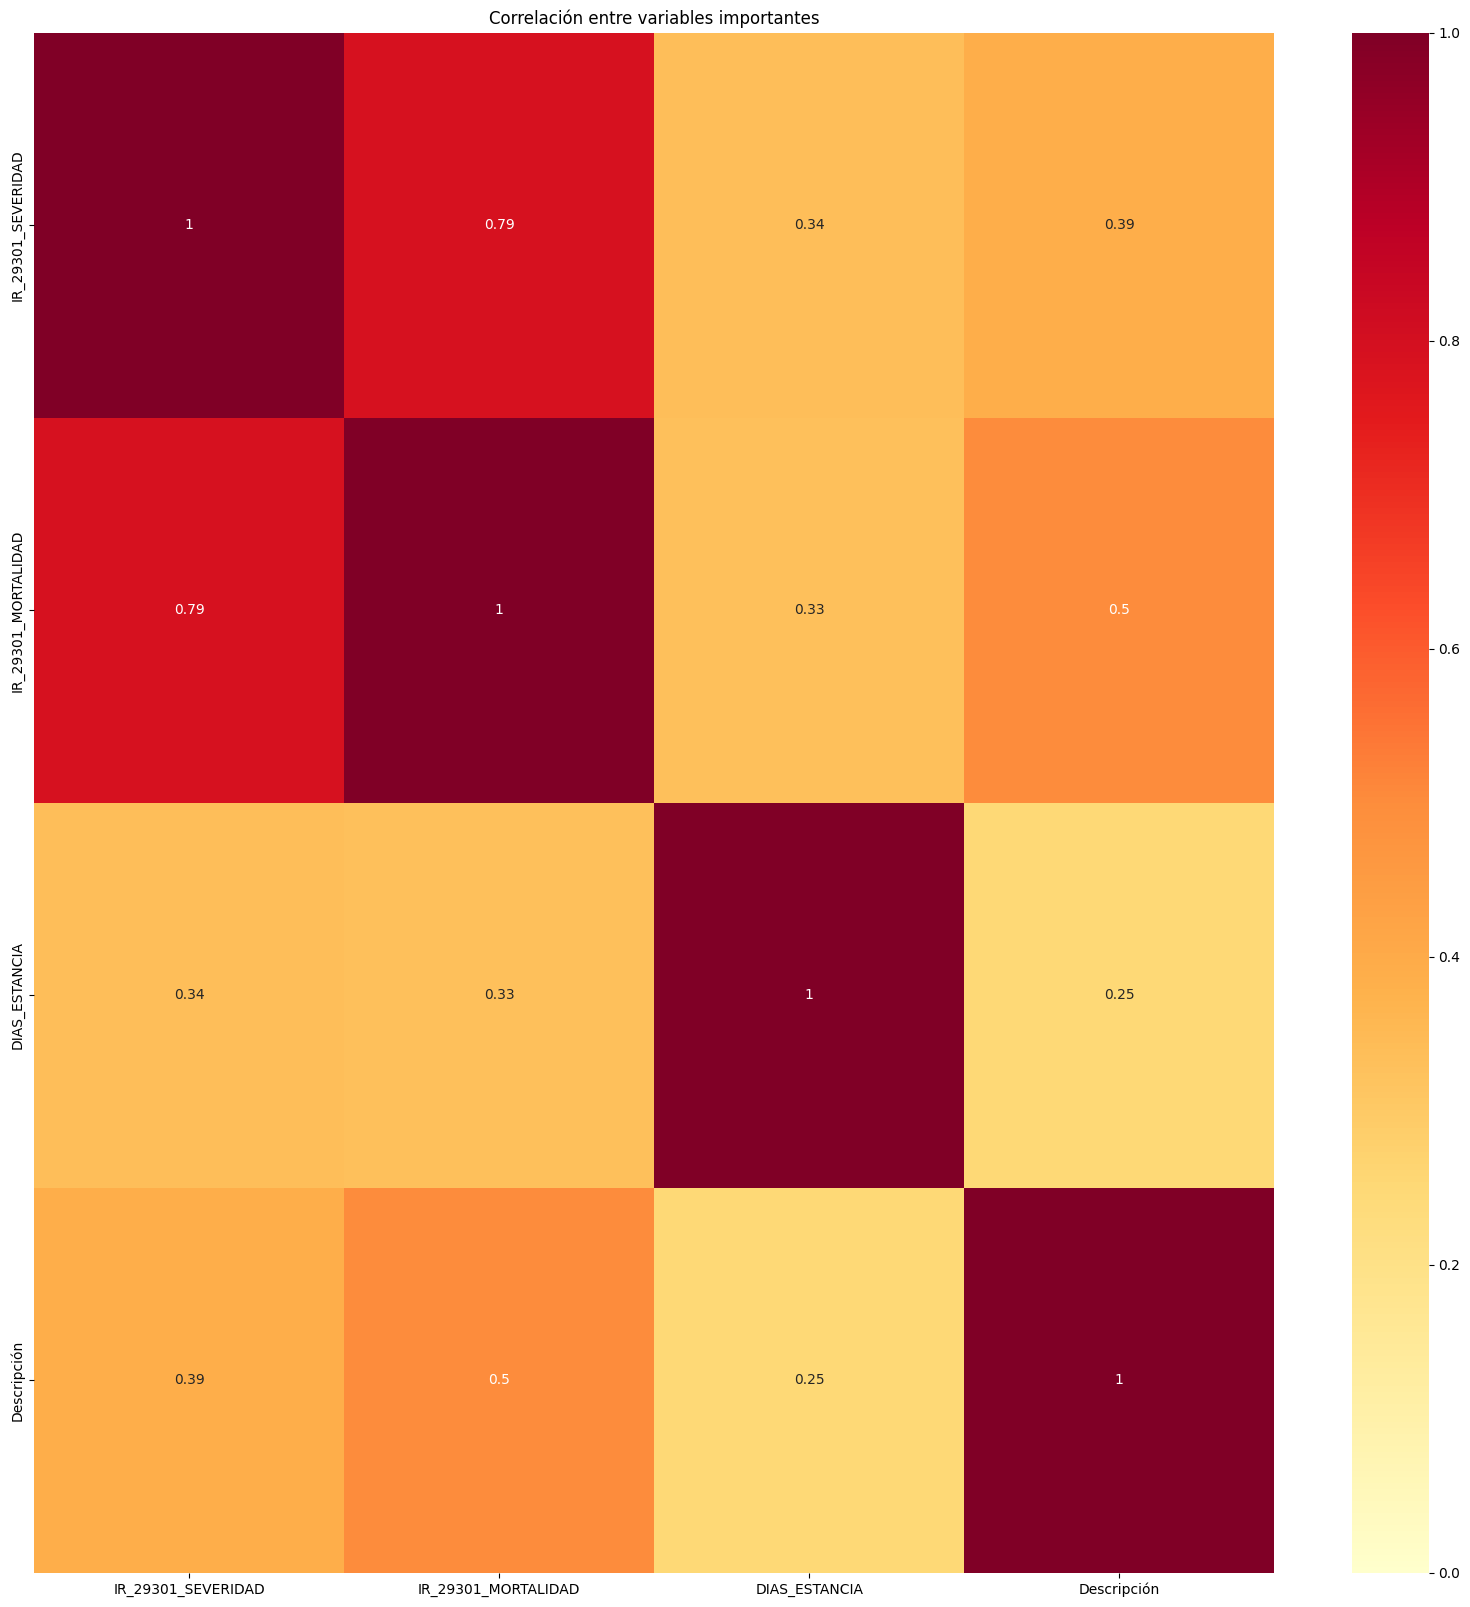

In [279]:
correlations = df_copy_num.corr(method = "pearson")
correlations.drop("EDAD", inplace = True)
correlations.drop(columns = ["EDAD"], axis = 1, inplace = True)
correlations["Descripción"] = np.array([0.390000, 0.500000, 0.250000])
correlations.loc['Descripción'] = [0.39, 0.5, 0.25, 1.0]

fig = plt.figure(figsize=(20,20))
sns.heatmap(correlations, annot = True, cmap = "YlOrRd", vmin = 0, vmax = 1)
plt.title("Correlación entre variables importantes")
plt.savefig("corr_importantes.png", dpi = 300, bbox_inches = "tight")
plt.show()